In [1]:
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Loaded 15 files: ['internet_valid12.png', 'internet_valid13.png', 'internet_valid14.png', 'internet_valid15.png', 'internet_valid16.png', 'S2_mel.png', 'S3_mel.png', 'S4_mel.png', 'S5_mel.png', 'S7_mel.png', 'valid1_mel.png', 'valid2_mel.png', 'valid3_mel.png', 'valid4_mel.png', 'valid5_mel.png']
Total images loaded: 15
Total images labeled: 15


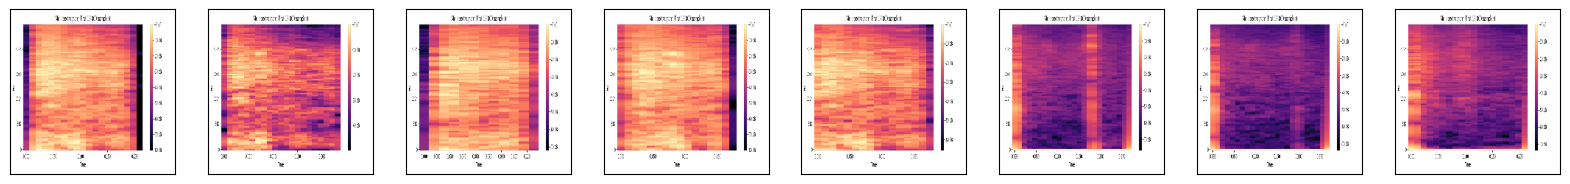

In [12]:
def load_images_from_path(path, label):
    images = []
    labels = []
    loaded_files = []

    for file in os.listdir(path):
        try:
            img_path = os.path.join(path, file)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
            loaded_files.append(file)
        except Exception as e:
            print(f"Error loading image {file}: {e}")
        
    print(f"Loaded {len(loaded_files)} files: {loaded_files}")
    return np.array(images), np.array(labels)

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255.0)


x = []
y = []
images, labels = load_images_from_path('train/', 0)
show_images(images)

x.extend(images)
y.extend(labels)

print(f"Total images loaded: {len(x)}")
print(f"Total images labeled: {len(y)}")

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
num_classes = 4  # Update according to your data
y_encoded = to_categorical(y, num_classes)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, stratify=y, test_size=0.3, random_state=0)

In [16]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [17]:
model = Sequential([
    Conv2D(12, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(24, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(24, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(24, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='softmax'),
    Dense(num_classes, activation='relu')
])

c:\Users\Personal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 12)   │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 12)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 24)   │         2,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     3,539,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,557,436 (13.57 MB)

 Trainable params: 3,557,436 (13.57 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
hist = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), batch_size=5, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.0000e+00 - loss: 16.1181 - val_accuracy: 0.0000e+00 - val_loss: 16.1181
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/ste

[]

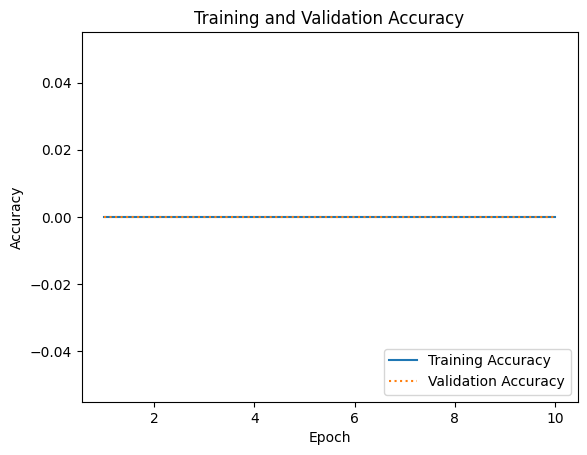

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()